In [1]:
import json

#package_dependency_file = "input/all-package-deps.cmr"
#project_name = "jfreechart"
project_name = "argouml"
package_dependency_file = "input/" + project_name + "/all-package-deps.cmr"
with open(package_dependency_file, 'r') as file:
    package_dependency_data = json.load(file)

#package_id_file = "input/idmap.json"
package_id_file = "input/" + project_name + "/idmap.json"
with open(package_id_file, 'r') as file:
    package_id_data = json.load(file)

In [2]:
package_dependency_graph_data = package_dependency_data['graph']
print("Keys in the graph:", package_dependency_graph_data.keys())

Keys in the graph: dict_keys(['vList', 'eList', 'lMap', 'clusterMap'])


In [3]:
# Get key from value
def get_key(val): 
    for key, value in package_id_data['keys'].items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

# Get the package name from the package id
def get_package_name(package_id):
    package_name_with_prefix = get_key(package_id)
    package_name = package_name_with_prefix.split('P')[1]
    return package_name

In [4]:
# Generate the graph data
import networkx as nx

G = nx.MultiDiGraph()

def add_nodes_to_graph(graph, nodes):
    for node in nodes:
        package_id = node['type']
        package_name = get_package_name(package_id)
        print("Package name:", package_name)
        graph.add_node(package_name)
        
add_nodes_to_graph(G, package_dependency_graph_data['vList'])

Package name: org.argouml.uml.reveng.ui
Package name: org.argouml.uml.diagram.collaboration
Package name: org.argouml.uml.diagram.state.ui
Package name: org.argouml.uml.diagram.use_case.ui
Package name: org.argouml.model.euml
Package name: org.argouml.state2.diagram
Package name: org.argouml.uml.util.namespace
Package name: org.argouml.uml
Package name: org.argouml.model
Package name: org.argouml.uml.ui.behavior.collaborations
Package name: org.argouml.taskmgmt
Package name: org.argouml.ui
Package name: org.argouml.profile.internal
Package name: org.argouml.uml.diagram.state
Package name: org.argouml.profile.init
Package name: org.argouml.uml.diagram.static_structure
Package name: org.argouml.cognitive.critics
Package name: org.argouml.notation2
Package name: org.argouml.persistence
Package name: org.argouml.uml.diagram.ui
Package name: org.argouml.ui.explorer.rules
Package name: org.argouml.uml.ui.behavior.common_behavior
Package name: org.argouml.transformer
Package name: org.argouml

In [5]:
def add_edges_to_graph(graph, edgeList):
    for edges in edgeList:
        for edge in edges['L']:
            source_package_id = edge['s']
            source_package_name = get_package_name(source_package_id)
            destination_package_id = edge['d']
            destination_package_name = get_package_name(destination_package_id)
            weight = edge['w']
            print(f"Edge: {source_package_name} -> {destination_package_name}, weight: {weight}")
            graph.add_edge(source_package_name, destination_package_name, weight=weight)

add_edges_to_graph(G, package_dependency_graph_data['eList'])

Edge: org.argouml.kernel -> org.argouml.uml.diagram, weight: 3
Edge: org.argouml.kernel -> org.argouml.uml.diagram, weight: 6
Edge: org.argouml.kernel -> org.argouml.uml.diagram, weight: 3
Edge: org.argouml.kernel -> org.argouml.uml.diagram, weight: 8
Edge: org.argouml.kernel -> org.argouml.uml.diagram, weight: 5
Edge: org.argouml.uml.ui.foundation.extension_mechanisms -> org.argouml.model, weight: 18
Edge: org.argouml.uml.ui.foundation.extension_mechanisms -> org.argouml.model, weight: 2
Edge: org.argouml.activity2 -> org.argouml.uml.ui, weight: 2
Edge: org.argouml.activity2 -> org.argouml.uml.ui, weight: 3
Edge: org.argouml.activity2 -> org.argouml.uml.ui, weight: 2
Edge: org.argouml.model.euml -> org.argouml.model, weight: 3
Edge: org.argouml.model.euml -> org.argouml.model, weight: 46
Edge: org.argouml.model.euml -> org.argouml.model, weight: 3
Edge: org.argouml.model.euml -> org.argouml.model, weight: 22
Edge: org.argouml.model.euml -> org.argouml.model, weight: 17
Edge: org.argou

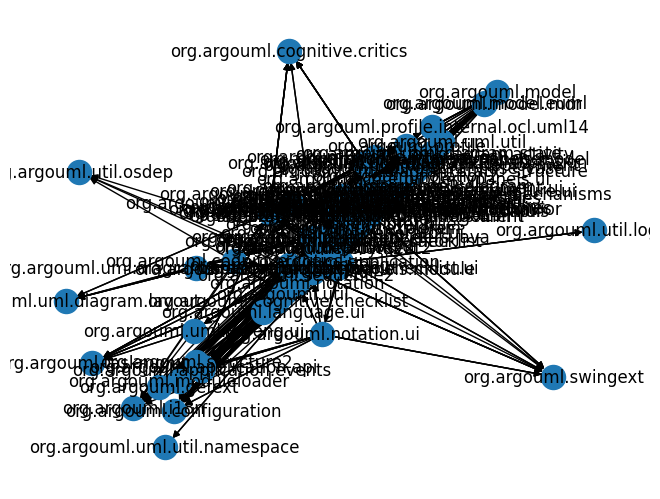

In [6]:
# Print the graph
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [7]:
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path, sep='\t')
    return data

def remove_empty_rows(data):
    data = data.dropna(subset=['Name'])
    return data

def remove_unnamed_columns(data):
    data = data.filter(regex='^(?!Unnamed.*)')
    return data

def remove_nan_columns(data):
    data = data.dropna(axis=1, how='all')
    return data

def convert_ordinal_to_numerical(data):
    ordinal_mapping = {
        'low': 1,
        'low-medium': 2,
        'medium-high': 3,
        'high': 4,
        'very-high': 5
    }
    columns_to_convert = ['Complexity', 'Coupling', 'Size', 'Lack of Cohesion']
    for column in columns_to_convert:
        data[column] = data[column].replace(ordinal_mapping)
    return data

#dataset_file = "input/dataset.csv"
dataset_file = "input/" + project_name + "/dataset.csv"
dataset = load_data(dataset_file)
dataset = remove_empty_rows(dataset)
dataset = remove_unnamed_columns(dataset)
dataset = remove_nan_columns(dataset)
dataset = convert_ordinal_to_numerical(dataset)

print(dataset.head())

                             QualifiedName                            Name   
1           <Package>org.argouml.activity2           org.argouml.activity2  \
2   <Package>org.argouml.activity2.diagram   org.argouml.activity2.diagram   
3         <Package>org.argouml.application         org.argouml.application   
4     <Package>org.argouml.application.api     org.argouml.application.api   
5  <Package>org.argouml.application.events  org.argouml.application.events   

   Complexity  Coupling  Size  Lack of Cohesion  #(C&I)    #C   #I    LOC   
1           1         1     1                 1     3.0   3.0  0.0   39.0  \
2           1         4     3                 1    30.0  26.0  4.0  847.0   
3           1         1     2                 1     6.0   6.0  0.0  476.0   
4           1         1     2                 1     7.0   2.0  5.0  170.0   
5           1         2     3                 1    16.0   9.0  7.0  353.0   

     AC    EC    Abs    Ins     ND    WMC  
1   0.0   2.0  0.000  1.

In [8]:
def label_god_component(row, complexity_threshold=2, size_threshold=2):
    if row['Complexity'] > complexity_threshold and row['Size'] > size_threshold:
        return 1
    else:
        return 0

# Label the dataset
dataset['is_god_component'] = dataset.apply(label_god_component, axis=1)

# Count the number of God Components
num_dataset_rows = dataset.shape[0]
num_god_components = dataset['is_god_component'].sum()
print(f'Number of instances in the dataset: {num_dataset_rows}')
print(f'Number of God Components in the dataset: {num_god_components}')

Number of instances in the dataset: 93
Number of God Components in the dataset: 17


In [9]:
def remove_labeling_columns(data):
    data = data.drop(['QualifiedName', 'Complexity', 'Coupling', 'Size', 'Lack of Cohesion'], axis=1)
    return data

dataset = remove_labeling_columns(dataset)
print(dataset.head())

                             Name  #(C&I)    #C   #I    LOC    AC    EC   
1           org.argouml.activity2     3.0   3.0  0.0   39.0   0.0   2.0  \
2   org.argouml.activity2.diagram    30.0  26.0  4.0  847.0   1.0  23.0   
3         org.argouml.application     6.0   6.0  0.0  476.0   0.0   4.0   
4     org.argouml.application.api     7.0   2.0  5.0  170.0  91.0   2.0   
5  org.argouml.application.events    16.0   9.0  7.0  353.0  41.0   7.0   

     Abs    Ins     ND    WMC  is_god_component  
1  0.000  1.000  0.000   12.0                 0  
2  0.133  0.958  0.091  187.0                 0  
3  0.000  1.000  0.000   97.0                 0  
4  0.857  0.022  0.121   31.0                 0  
5  0.500  0.146  0.354  121.0                 0  


In [10]:
# Embedding software metrics in dataset to nodes in the graph
def get_node_embedding(node, data):
    node_embedding = data.loc[data['Name'] == node]
    return node_embedding

def get_node_embedding_list(graph, data):
    node_embedding_list = []
    for node, node_data in graph.nodes(data=True):
        node_embedding = get_node_embedding(node, data)
        node_data['NumberOfEntities'] = node_embedding['#(C&I)'].iloc[0]
        node_data['NumberOfClasses'] = node_embedding['#C'].iloc[0]
        node_data['NumberOfInterface'] = node_embedding['#I'].iloc[0]
        node_data['LOC'] = node_embedding['LOC'].iloc[0]
        node_data['AC'] = node_embedding['AC'].iloc[0]
        node_data['EC'] = node_embedding['EC'].iloc[0]
        node_data['Abstractness'] = node_embedding['Abs'].iloc[0]
        node_data['Instability'] = node_embedding['Ins'].iloc[0]
        node_data['NormalizedDistances'] = node_embedding['ND'].iloc[0]
        node_data['WMC'] = node_embedding['WMC'].iloc[0]
        node_data['is_god_component'] = node_embedding['is_god_component'].iloc[0]
        print('node_data: ', node_data)
    return node_embedding_list

node_embedding_list = get_node_embedding_list(G, dataset)
print(node_embedding_list)

node_data:  {'NumberOfEntities': 5.0, 'NumberOfClasses': 5.0, 'NumberOfInterface': 0.0, 'LOC': 240.0, 'AC': 2.0, 'EC': 3.0, 'Abstractness': 0.0, 'Instability': 0.6, 'NormalizedDistances': 0.4, 'WMC': 35.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 1.0, 'NumberOfClasses': 1.0, 'NumberOfInterface': 0.0, 'LOC': 198.0, 'AC': 2.0, 'EC': 1.0, 'Abstractness': 0.0, 'Instability': 0.333, 'NormalizedDistances': 0.667, 'WMC': 76.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 36.0, 'NumberOfClasses': 36.0, 'NumberOfInterface': 0.0, 'LOC': 3005.0, 'AC': 14.0, 'EC': 34.0, 'Abstractness': 0.083, 'Instability': 0.708, 'NormalizedDistances': 0.209, 'WMC': 735.0, 'is_god_component': 1}
node_data:  {'NumberOfEntities': 15.0, 'NumberOfClasses': 15.0, 'NumberOfInterface': 0.0, 'LOC': 963.0, 'AC': 7.0, 'EC': 13.0, 'Abstractness': 0.0, 'Instability': 0.65, 'NormalizedDistances': 0.35, 'WMC': 202.0, 'is_god_component': 0}
node_data:  {'NumberOfEntities': 43.0, 'NumberOfClasses': 43.0

In [11]:
# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.argouml.uml.reveng.ui, embedding: {'NumberOfEntities': 5.0, 'NumberOfClasses': 5.0, 'NumberOfInterface': 0.0, 'LOC': 240.0, 'AC': 2.0, 'EC': 3.0, 'Abstractness': 0.0, 'Instability': 0.6, 'NormalizedDistances': 0.4, 'WMC': 35.0, 'is_god_component': 0}
Node: org.argouml.uml.diagram.collaboration, embedding: {'NumberOfEntities': 1.0, 'NumberOfClasses': 1.0, 'NumberOfInterface': 0.0, 'LOC': 198.0, 'AC': 2.0, 'EC': 1.0, 'Abstractness': 0.0, 'Instability': 0.333, 'NormalizedDistances': 0.667, 'WMC': 76.0, 'is_god_component': 0}
Node: org.argouml.uml.diagram.state.ui, embedding: {'NumberOfEntities': 36.0, 'NumberOfClasses': 36.0, 'NumberOfInterface': 0.0, 'LOC': 3005.0, 'AC': 14.0, 'EC': 34.0, 'Abstractness': 0.083, 'Instability': 0.708, 'NormalizedDistances': 0.209, 'WMC': 735.0, 'is_god_component': 1}
Node: org.argouml.uml.diagram.use_case.ui, embedding: {'NumberOfEntities': 15.0, 'NumberOfClasses': 15.0, 'NumberOfInterface': 0.0, 'LOC': 963.0, 'AC': 7.0, 'EC': 13.0, 'Abstractness

In [12]:
# Save the graph data to a file
import pickle

with open('output/graph_data.pickle', 'wb') as file:
    pickle.dump(G, file)

In [13]:
# Load the graph data from a file
import pickle

with open('output/graph_data.pickle', 'rb') as file:
    G = pickle.load(file)

# Print nodes with their embedding
for node, embedding in G.nodes(data=True):
    print(f"Node: {node}, embedding: {embedding}")

Node: org.argouml.uml.reveng.ui, embedding: {'NumberOfEntities': 5.0, 'NumberOfClasses': 5.0, 'NumberOfInterface': 0.0, 'LOC': 240.0, 'AC': 2.0, 'EC': 3.0, 'Abstractness': 0.0, 'Instability': 0.6, 'NormalizedDistances': 0.4, 'WMC': 35.0, 'is_god_component': 0}
Node: org.argouml.uml.diagram.collaboration, embedding: {'NumberOfEntities': 1.0, 'NumberOfClasses': 1.0, 'NumberOfInterface': 0.0, 'LOC': 198.0, 'AC': 2.0, 'EC': 1.0, 'Abstractness': 0.0, 'Instability': 0.333, 'NormalizedDistances': 0.667, 'WMC': 76.0, 'is_god_component': 0}
Node: org.argouml.uml.diagram.state.ui, embedding: {'NumberOfEntities': 36.0, 'NumberOfClasses': 36.0, 'NumberOfInterface': 0.0, 'LOC': 3005.0, 'AC': 14.0, 'EC': 34.0, 'Abstractness': 0.083, 'Instability': 0.708, 'NormalizedDistances': 0.209, 'WMC': 735.0, 'is_god_component': 1}
Node: org.argouml.uml.diagram.use_case.ui, embedding: {'NumberOfEntities': 15.0, 'NumberOfClasses': 15.0, 'NumberOfInterface': 0.0, 'LOC': 963.0, 'AC': 7.0, 'EC': 13.0, 'Abstractness